In [1]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

# **Vamos a analizar el dataset de Housing California**

---



## Importo el dataset

Vamos a descargar un dataset de Kaggle para predecir el valor de una casa.

Para eso deben descargarlo desde https://www.kaggle.com/datasets/camnugent/california-housing-prices y deben subir el archivo csv en Google Drive. Completen la celda siguiente con el path al archivo dentro de colab.

In [2]:
#Conectar el colab a su google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#TODO: completar con la ruta al archivos csv.

path = '/content/drive/MyDrive/Colab Notebooks/housing.csv'

housing = pd.read_csv(path) #Leemos el csv con Pandas

## Analisis de datos

Con las funciones basicas de pandas comenzamos a visualizar los datos.

In [5]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Una buena forma de empezar a visualizar los datos es graficar features vs features

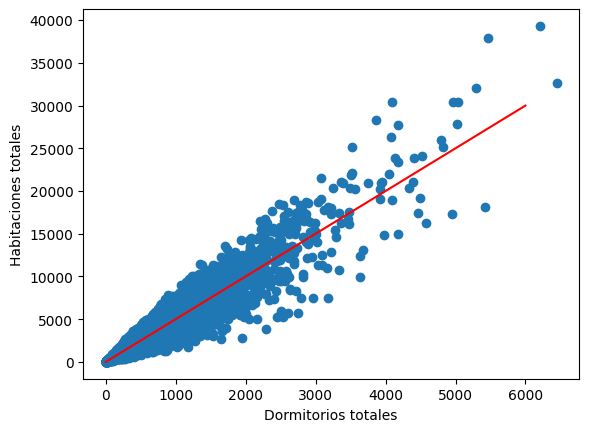

In [12]:
plt.scatter(housing['total_bedrooms'],housing['total_rooms'])
plt.xlabel("Dormitorios totales")
plt.ylabel("Habitaciones totales")
plt.plot(np.arange(0,6000), np.arange(0,6000)*5,color='red')

Pandas nos da una función que hace esto para todos las columnas

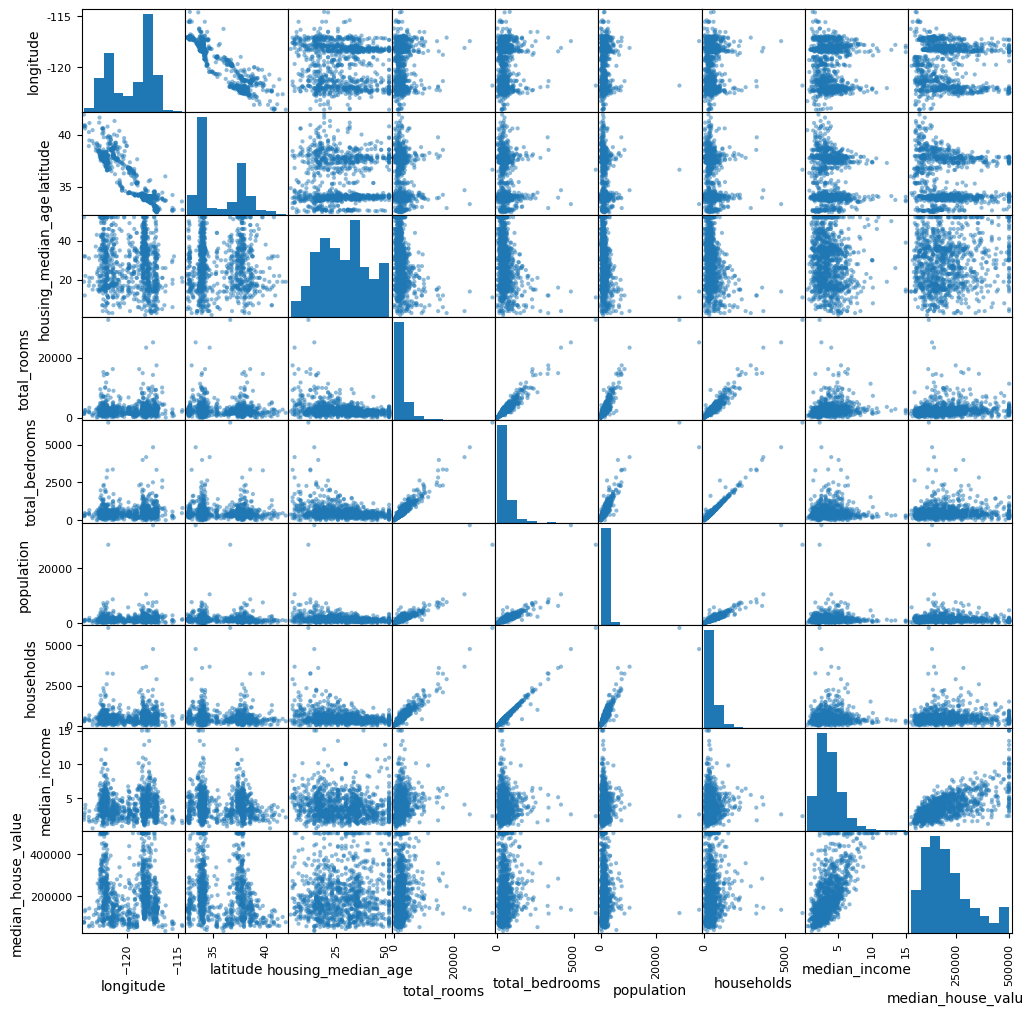

In [13]:
_=pd.plotting.scatter_matrix(housing.iloc[::20], figsize=(12, 12), alpha=0.5)

Podemos armar tambien la matriz de correlación de las variables. Esta matriz nos dice que tan correlacionadas linealmente estan las variables mediante el correlación de Pearson.
[Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg">

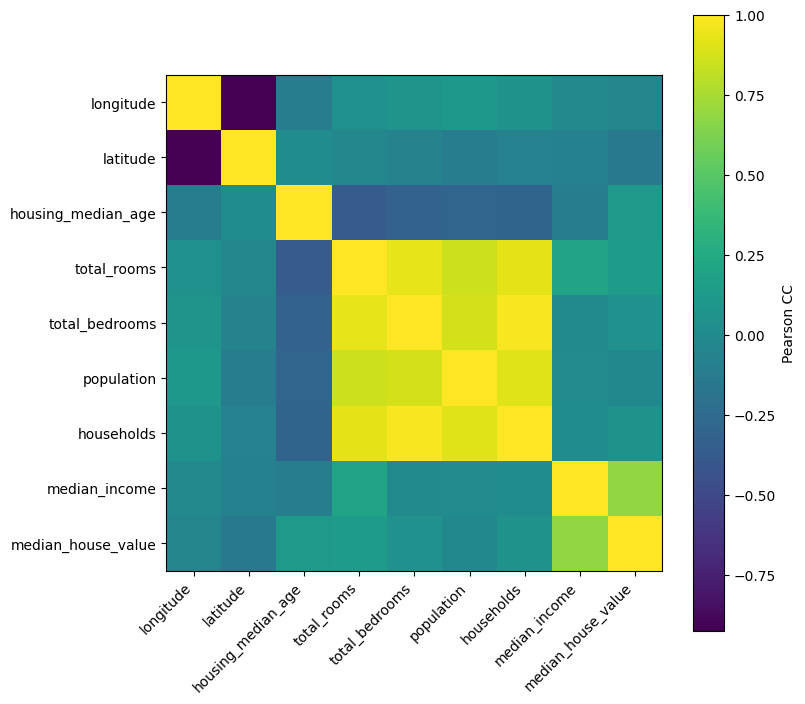

In [14]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
plt.figure(figsize=(8,8))
plt.imshow(corr_matrix)

# Set ticks
xt = plt.xticks(np.arange(9), housing.drop("ocean_proximity", axis=1).columns, rotation=45, ha='right')
yt = plt.yticks(np.arange(9), housing.drop("ocean_proximity", axis=1).columns, rotation=0)

# Set colorbar
plt.colorbar(label='Pearson CC')

Tambien graficamos los histogramas de cada variables, para entender como es su distribución

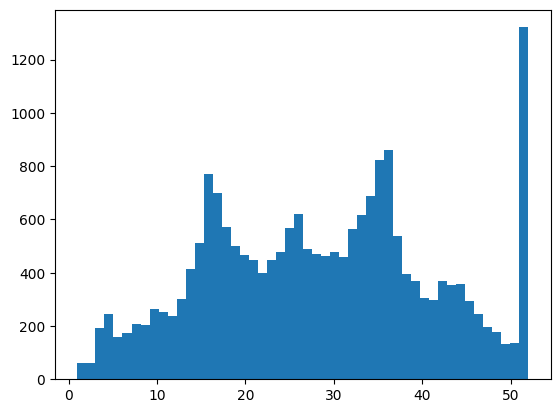

In [15]:
plt.hist(housing["housing_median_age"],bins=50)
plt.show()

De nuevo, pandas nos da una función que lo hace para todas las columnas

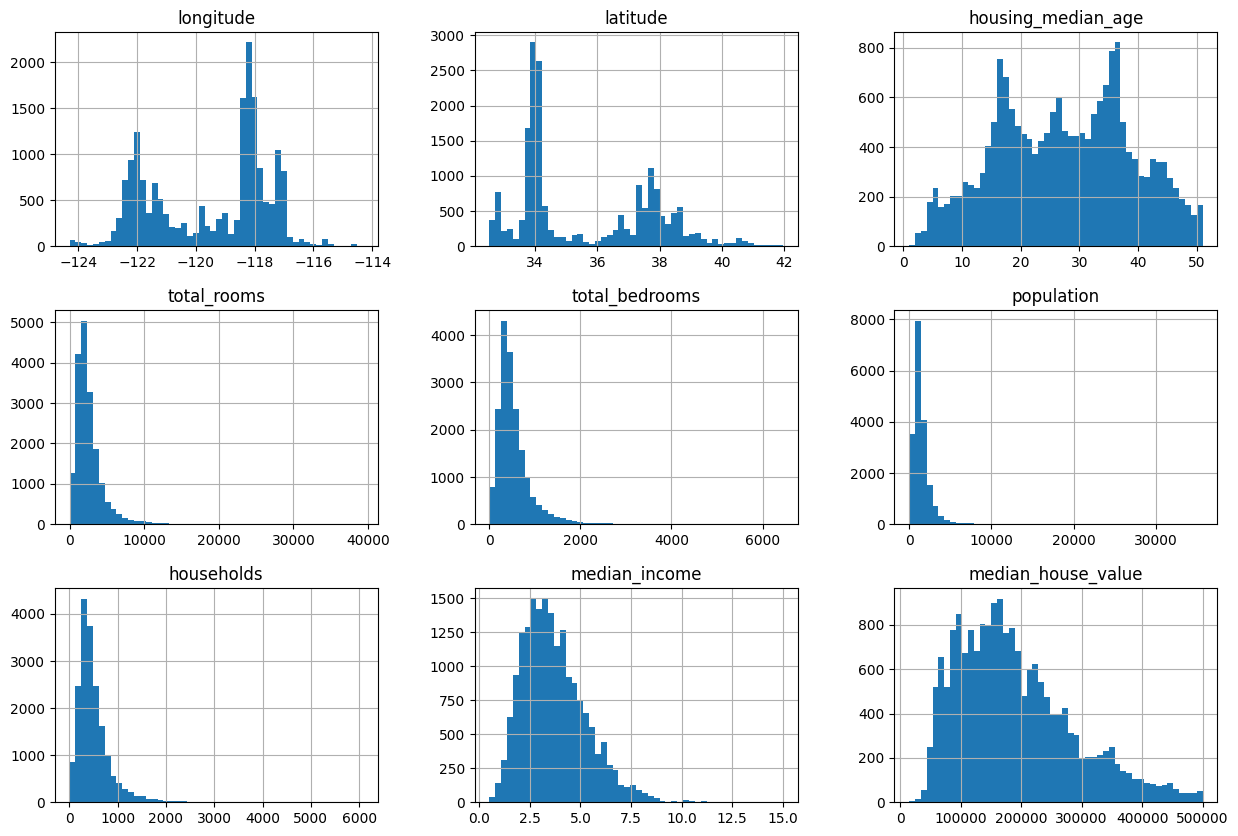

In [21]:
housing.hist(bins=50, figsize=(15,10))
plt.show()

**Pregunta:** Notan algo raro en los histogramas?

In [17]:
#Esta celda busca el valor más grande de las columnas problemáticas y se fija cuántos valores tiene
columnas_problematicas = ['median_house_value', 'housing_median_age']
max_values=[]
for col in columnas_problematicas:
    max_value = housing[col].max()
    print(f"{col}: {sum(housing[col] == max_value)} datos con {col} = {max_value} ({round(sum(housing[col] == max_value)/len(housing)*100,2)}%).")
    max_values.append(max_value)

median_house_value: 965 datos con median_house_value = 500001.0 (4.68%).
housing_median_age: 1273 datos con housing_median_age = 52.0 (6.17%).


In [18]:
print(max_values)

[500001.0, 52.0]


In [19]:
for col, max_value in zip(columnas_problematicas, max_values):
    print(col, max_value)
    housing = housing[housing[col] != max_value] #elimina las filas que valgan el valor máximo

median_house_value 500001.0
housing_median_age 52.0


In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18572 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18572 non-null  float64
 1   latitude            18572 non-null  float64
 2   housing_median_age  18572 non-null  float64
 3   total_rooms         18572 non-null  float64
 4   total_bedrooms      18379 non-null  float64
 5   population          18572 non-null  float64
 6   households          18572 non-null  float64
 7   median_income       18572 non-null  float64
 8   median_house_value  18572 non-null  float64
 9   ocean_proximity     18572 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Armamos modelo de Machine Learning

## Definion del problema y label

Hay que pensar que queremos predecir.

También diferenciamos las variables categóricas de las numéricas.

In [ ]:
#TODO: completar con el nombre de la columna a predecir
feature_label = ""

housing_label = housing[feature_label] #Me quedo con la columna de label

housing_data = housing.drop(feature_label, axis=1) #Features para el entrenamiento


#Divido variables numéricas de categóricas

#TODO: completar con nombre de la columna categórica
feature_categorica = ""

housing_cat = housing_data[[feature_categorica]]

housing_num = housing_data.drop(feature_categorica, axis=1)

In [ ]:
housing_num

## Armamos el pipeline de preprocesado

### OneHotEncoder()
para las variables categoricas


In [ ]:
ohe=OneHotEncoder()


housing_cat_ohe=ohe.fit_transform(housing[[feature_categorica]])

In [ ]:
housing_cat_ohe

In [22]:
housing_cat_ohe.toarray()

NameError: name 'housing_cat_ohe' is not defined

In [ ]:
housing[['ocean_proximity']]

### Ahora si armamos el Pipeline

*ColumnTransformer* es una función que te permite aplicar distintas transformaciones a cada columna que se le indique.


In [ ]:
#Para numéricas
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

#Para categóricas
cat_pipeline=OneHotEncoder()

num_attribs = list(housing_num) #Todas las features numéricas

cat_attribs = ["ocean_proximity"]

#establecemos el pipeline completo con num + cat
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline , cat_attribs),
    ])

housing_data_pre = full_pipeline.fit_transform(housing_data)

In [ ]:
df = pd.DataFrame(housing_data_pre) #Convertirmos los datos preprocesados en dataframe
df.info()

In [ ]:
#Miramos las primeras 5 filas del dataframe
df.head(5)

## Split en Train y Test

Una vez procesados los datos, divido en Train y Test

In [ ]:
#TODO: completar
... = train_test_split(housing_data_pre, housing_label, test_size=0.2, random_state=42)

In [ ]:
# Vemos las dimensiones de los conjuntos
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

## Modelo: LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()

#TODO: completar el método fit()
modelo_lineal.fit(...)


In [ ]:
prediccion = modelo_lineal.predict(x_test[0].reshape(1,-1))

print(f"Predije {prediccion} y la casa vale {y_test.array[0]}")

In [ ]:
prediccion = modelo_lineal.predict(x_train[0].reshape(1,-1))

print(f"Predije {prediccion} y la casa vale {y_train.array[0]}")

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y,t):
  return np.sqrt(mean_squared_error(y,t))

In [ ]:
y_pred_train = modelo_lineal.predict(x_train)
y_pred_test = modelo_lineal.predict(x_test)

#TODO: completar el error de test
print("Error de entrenamiento: ", rmse(y_train, y_pred_train))
print("Error de test: ", ...)

## Modelo: DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelo_arbol = DecisionTreeRegressor(max_depth=10) #Prueben cambiando la profundidad

# TODO: completar
modelo_arbol.fit(...)


In [ ]:
prediccion = modelo_arbol.predict(x_test[0].reshape(1,-1))

print(f"Predije {prediccion} y la casa vale {y_test.array[0]}")

In [ ]:
prediccion = modelo_arbol.predict(x_train[0].reshape(1,-1))

print(f"Predije {prediccion} y la casa vale {y_train.array[0]}")

In [ ]:
y_pred_train = modelo_arbol.predict(x_train)
y_pred_test = modelo_arbol.predict(x_test)

# TODO: completar
print("Error de entrenamiento: ", )
print("Error de test: ", ...)

## Modelo: RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo_bosque = RandomForestRegressor(max_depth=20) #Prueben cambiando la profundidad

# completar
modelo_bosque.fit(...)


In [ ]:
prediccion = modelo_bosque.predict(x_test[0].reshape(1,-1))

print(f"Predije {prediccion} y la casa vale {y_test.array[0]}")

In [ ]:
prediccion = modelo_bosque.predict(x_train[0].reshape(1,-1))

print(f"Predije {prediccion} y la casa vale {y_train.array[0]}")

In [ ]:
y_pred_train = modelo_bosque.predict(x_train)
y_pred_test = modelo_bosque.predict(x_test)

# completar
print("Error de entrenamiento: ", ...)
print("Error de test: ", ...)

## Modelo: XGBoost

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
modelo_xgb = XGBRegressor()

modelo_xgb.fit(...) #completar

In [ ]:
prediccion = modelo_xgb.predict(x_test[0].reshape(1,-1))

print(f"Predije {prediccion} y la casa vale {y_test.array[0]}")

In [ ]:
prediccion = modelo_xgb.predict(x_train[0].reshape(1,-1))

print(f"Predije {prediccion} y la casa vale {y_train.array[0]}")

In [ ]:
y_pred_train = modelo_xgb.predict(x_train)
y_pred_test = modelo_xgb.predict(x_test)

# completar
print("Error de entrenamiento: ", ...)
print("Error de test: ", ...)

### Hyperparameter Tunning

El modelo `XGBoost` tiene muchos hiper parámetros, vamos a realizar una búsqueda para encontrar los mejores.

In [ ]:
from sklearn.model_selection import cross_validate
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# función para saber cuánto tiempo tarda random search
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
# hiper parámetros a buscar y sobre los distintos valores
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [ ]:
modelo_xgb = XGBRegressor()

In [ ]:
random_search = RandomizedSearchCV(estimator=modelo_xgb, param_distributions=params, n_iter=20, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

start_time = timer(None)
random_search.fit(x_train, y_train)
timer(start_time)

In [ ]:
#imprimir los resultados de Random Search
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)

### Comparamos el modelo normal, y el modelo con los nuevos hiper parámetros

In [ ]:
modelo_xgb_tuned = random_search.best_estimator_
modelo_xgb_tuned.fit(x_train, y_train)

In [ ]:
modelo_xgb = XGBRegressor()

modelo_xgb.fit(x_train, y_train)

In [ ]:
y_pred_train = modelo_xgb.predict(x_train)
y_pred_test = modelo_xgb.predict(x_test)

print("Sin hyperparameter tunning:")
print("Error de entrenamiento: ", rmse(y_train, y_pred_train))
print("Error de test: ", rmse(y_test ,y_pred_test))

y_pred_train = modelo_xgb_tuned.predict(x_train)
y_pred_test = modelo_xgb_tuned.predict(x_test)

print("\nCon hyperparameter tunning:")
print("Error de entrenamiento: ", rmse(y_train, y_pred_train))
print("Error de test: ", rmse(y_test ,y_pred_test))

# Agregando features

Otra técninca de **feature engineering** es crear nuevas features relacionando columnas del dataset. Por ejemplo, en este caso podemos crear la feature `bedrooms_per_room`, dividiendo la columna `total_bedrooms` entre `total_rooms`. Esta nueva feature expresa el porcentaje de dormitorios entre todas las habitaciones, podría mejorar la performance del modelo.

Podemos agregar los siguientes features:

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Como ejercicio, pueden volver a hacer el modelo con eestos nuevos features